In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = "train.txt"
df = pd.read_csv(train, sep=' ', header=None, names=['head', 'rel','tail'])

In [3]:
def get_group_details(group):
    return pd.DataFrame({'rel': group['rel'].values,
                         'head': group['head'].values,
                         'tail': group['tail'].values})

In [4]:
group_details_df=df.groupby('rel').apply(get_group_details)

In [5]:
group_details_df = group_details_df.reset_index(drop=True)

In [6]:
group_details_df

,rel,head,tail
0,0,2547,3032
1,0,5673,3033
2,0,4929,6245
3,0,2406,5007
4,0,5312,5007
...,...,...,...
87348,236,1441,5353
87349,236,6402,5353
87350,236,6020,5353
87351,236,2044,5353


In [7]:
fb15k = torch.load("fb15k2371704548121.pth",map_location='cuda')

NameError: name 'title' is not defined

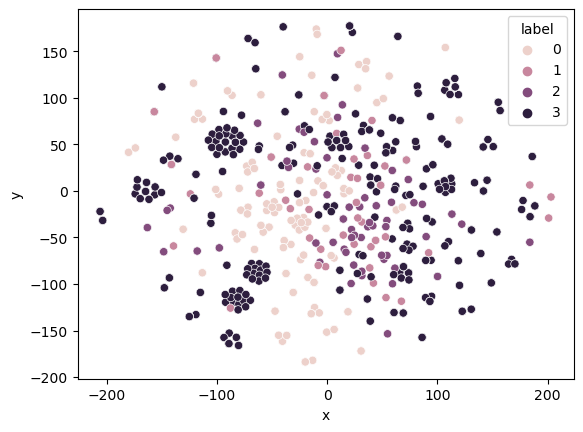

In [9]:
import random
total=0
for i in range(len(group_details_df)):
    if group_details_df['rel'][i] == 4:
        total=i
        break
random_array = random.sample(range(total), 1000)
y_value=[None for _ in range(1000)]
x_value=[None for _ in range(1000)]
for i in range(1000):
    j = random_array[i]
    y_value[i] = group_details_df['rel'][j]
    x_value[i] = fb15k["ent_embedding.weight"][group_details_df['head'][j]].cpu().numpy() 
x_value= np.array(x_value)
y_value= np.array(y_value)
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
x_tsne = tsne.fit_transform(x_value)
df = pd.DataFrame(x_tsne, columns=['x', 'y'])
df['label'] = y_value
sns.scatterplot(x="x", y="y", hue="label", data=df)
plt.title(title)
plt.show()

In [ ]:
import random
from datetime import datetime
for k in range(500):
    random_rel = random.sample(range(236),4)
    total=0
    sne_list=[]
    for i in range(len(group_details_df)):
        if group_details_df['rel'][i] == random_rel[0] or group_details_df['rel'][i] == random_rel[1] or group_details_df['rel'][i] == random_rel[2] or group_details_df['rel'][i] == random_rel[3]  :
            total = total + 1
            data = {'rel':group_details_df['rel'][i], 'head': group_details_df['head'][i], 'tail': group_details_df['head'][i]}
            sne_list.append(data)
    sne_array = np.array(sne_list)
    random_array = random.sample(range(total), total)
    y_value=[None for _ in range(total)]
    x_value=[None for _ in range(total)]
    for i in range(total):
        j = random_array[i]
        y_value[i] = sne_list[j]['rel']
        x_value[i] = fb15k["ent_embedding.weight"][sne_list[j]['tail']].cpu().numpy() + fb15k["rel_embedding.weight"][sne_list[j]['rel']].cpu().numpy()
        # y_value[i] = sne_list[i]['rel']
        # x_value[i] = fb15k["ent_embedding.weight"][sne_list[i]['tail']].cpu().numpy() 
    x_value= np.array(x_value)
    y_value= np.array(y_value)
    from sklearn.manifold import TSNE
    tsne = TSNE(n_components=2,init='pca',n_iter=5000)
    x_tsne = tsne.fit_transform(x_value)
    df = pd.DataFrame(x_tsne, columns=['x', 'y'])
    df['label'] = y_value
    color=['#ffbfbf','#8bc5d3','#adc591','#fde498']
    sns.scatterplot(x="x", y="y", data=df, hue='label',palette = sns.color_palette(color),markers=False)
    now = datetime.now()
    label_string = str(y_value[0])+'-'+ str(y_value[1]) +'-'+ str(y_value[2]) +'-'+ str(y_value[3])
    # time_string = now.strftime("%m-%d-%H-%M-%S")
    plt.legend().remove()
    pltname = "D:\work\czy\img\img2\img_" + label_string + ".png"
    plt.savefig(pltname)
    plt.show()

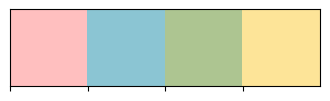

In [106]:
color=['#ffbfbf','#8bc5d3','#adc591','#fde498']
sns.palplot(sns.color_palette(color))